In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def load_matrix(address):
    """Loads data set and returns training set X and output y"""
    data_set = np.loadtxt(address, delimiter=",")
    x, y = data_set[:, :-1], data_set[:, -1]
    y = y.reshape(y.shape[0], 1)
    return x, y

In [3]:
def scatter_plot(address):
    """Plots the data"""
    data_set = np.loadtxt(address, delimiter=",")
    pos, neg = data_set[:,2] == 1, data_set[:,2] == 0
    plt.plot(data_set[pos][:,0], data_set[pos][:,1], '+')
    plt.plot(data_set[neg][:,0], data_set[neg][:,1], 'x')
    plt.legend([ 'Admitted', 'Not admitted'])
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')

In [4]:
def sigmoid(x):
    """Compute the sigmoid of x"""
    s = 1/(1+np.exp(-x))
    return s

In [5]:
def initialize_parameters(size):
    """Initializes parameters and bias and returns them"""
    w, b = np.zeros((size, 1)), 0
    b=-24
    w[0][0], w[1][0]=0.2, 0.2
    return w, b

In [6]:
def predict(x, w, b):
    """Predicts the output based on current weights and biases"""
    predictions = sigmoid(np.dot(x, w)+b)
    return predictions

In [7]:
def compute_cost_grad(x, y, w, b, m):
    h = predict(x, w, b)
    cost = (-1/m)*np.sum(y*np.log(h+0.0000000001)+(1-y)*np.log(1.0000000001-h))
    dw = (1/m)*np.dot(training_set_x.T,(h-y))
    db = (1/m)*np.sum(h-y)
    return cost, dw, db

In [8]:
def gradient_descent(x, y, w, b, m, n, iterations, learn_rate):
    '''Implements gradient descent'''
    J_hist = np.zeros((iterations,2))
    for i in range(iterations):
        J_hist[i][0] = i+1 
        J_hist[i][1], grad_w, grad_b = compute_cost_grad(x, y, w, b, m)
        w = w - learn_rate*grad_w
        b = b - learn_rate*grad_b
    return w, b, J_hist

In [9]:
def plot_cost_history(J_history):
    plt.plot(J_history[:, 0], J_history[:, 1])
    plt.title("Cost History")
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")

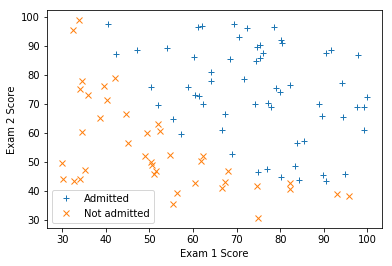

In [10]:
training_set_x, training_set_y = load_matrix("ex2data1.txt")
examples, features = training_set_x.shape[0], training_set_x.shape[1]

learning_rate = 0.00001
num_iterations = 2000
weight, bias = initialize_parameters(features)

scatter_plot('ex2data1.txt')

In [11]:
cost, grad_w, grad_b = compute_cost_grad(training_set_x, training_set_y, weight, bias, examples)
print("Cost at initial parameters (zeros): ", cost)
print("\nWeight Gradients: ", grad_w)
print("\nBias Gradient: ", grad_b)

Cost at initial parameters (zeros):  0.21833019366405806

Weight Gradients:  [[2.56623412]
 [2.64679737]]

Bias Gradient:  0.042902994899534454


In [12]:
print("Running Gradient Descent...")
weight, bias, J_history = gradient_descent(training_set_x, training_set_y, weight, bias, examples, features, num_iterations, learning_rate)
print('Parameters found by gradient descent:\nWeight: ', weight)
print('\nBias: ', bias)
print('Final cost: ',J_history[-1][1])

Running Gradient Descent...
Parameters found by gradient descent:
Weight:  [[0.19571123]
 [0.19335622]]

Bias:  -24.000096128270876
Final cost:  0.2037625090535351


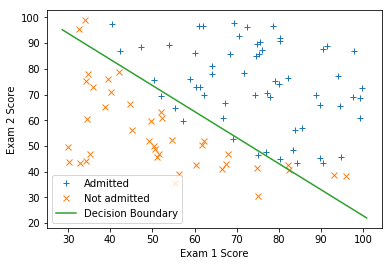

In [25]:
scatter_plot('ex2data1.txt')

plot_x = [min(training_set_x[:,1])-2,  max(training_set_x[:,1])+2]
plot_y = (-1/weight[1])*(weight[0]*plot_x + bias)
plt.plot(plot_x, plot_y)
plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])

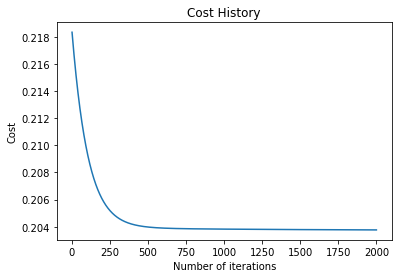

In [13]:
plot_cost_history(J_history)

In [14]:
predictions = predict(training_set_x, weight, bias)
predictions = predictions>=0.5
predictions = predictions.astype(int)
cnt = 0
for i in range(examples):
    if predictions[i]==training_set_y[i]:
        cnt = cnt+1
print("Correctly predicted data count: ",cnt)

Correctly predicted data count:  90


In [15]:
test = np.mat([[45, 85]])
prob = predict(test, weight, bias)
print("For a student with scores 45 and 85, we predict an admission probability: ",prob)
print("Loss: ", np.mean(abs(predict(training_set_x, weight, bias) -training_set_y)))

For a student with scores 45 and 85, we predict an admission probability:  [[0.7759446]]
Loss:  0.13119931512765087
